In [166]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.signal
import keras
import ipywidgets as widgets


(89400, 5)
(89400, 16, 16, 3)
(595, 5)
(595, 16, 16, 3)
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 2

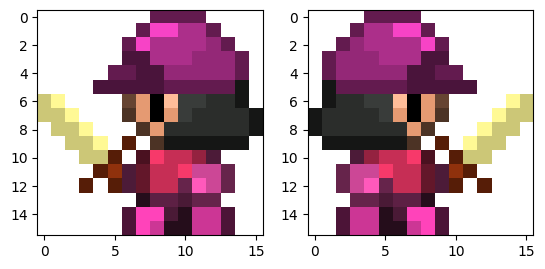

In [167]:
data = np.load('./Dataset1/sprites_labels.npy')
sprites = np.load('./Dataset1/sprites.npy')

print(data.shape)
print(sprites.shape)

selected_data = data[:894]
selected_data = np.delete(selected_data, slice(244, 543), axis=0)
print(selected_data.shape)

selected_sprites = sprites[:894]
selected_sprites = np.delete(selected_sprites, slice(244, 543), axis=0)
print(selected_sprites.shape)

data_with_mirrored = np.concatenate((selected_data, selected_data), axis=0)

mirrored_sprites = np.flip(selected_sprites, axis=2)
sprites_with_mirrored = np.concatenate((selected_sprites, mirrored_sprites), axis=0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(selected_sprites[1])
ax[1].imshow(mirrored_sprites[1]);

print(sprites_with_mirrored)


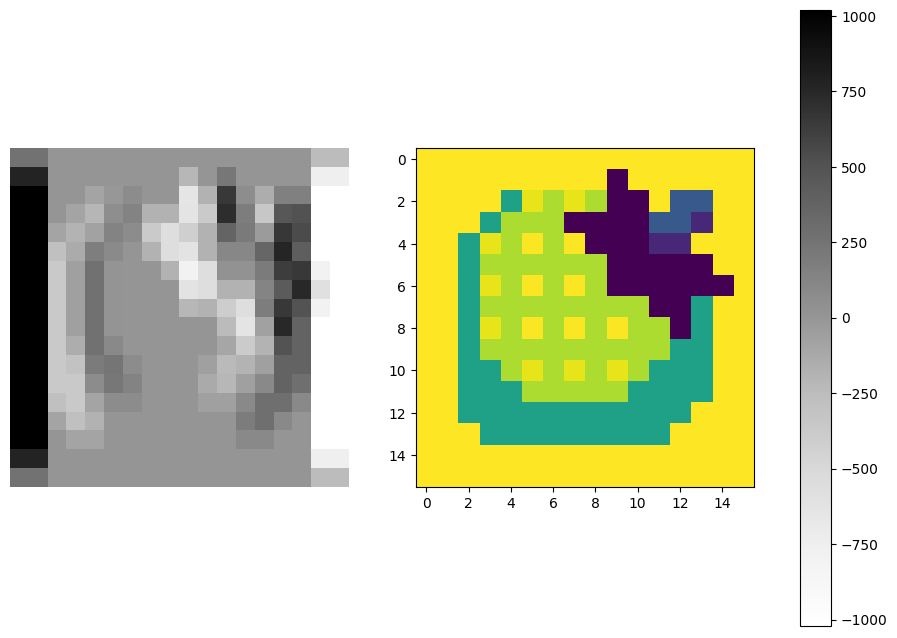

In [168]:
X_train, X_test, y_train, y_test = train_test_split(sprites_with_mirrored, data_with_mirrored)

y_train_one_hot = tf.keras.utils.to_categorical(y_train, 5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 5)



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


conv_result = scipy.signal.convolve2d(X_train[400, :, :, :1].reshape(16, 16), np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T)
im = ax.imshow(conv_result, cmap='Greys')
ax2.imshow(X_train[400, :, :, :1])
ax.axis('off')
fig.colorbar(im, ax=[ax, ax2]);



In [169]:


'''
conv_network = tf.keras.Sequential()

conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,1)))
conv_network.add(tf.keras.layers.Flatten())

conv_network.add(tf.keras.layers.Dense(100, activation='relu'))
conv_network.add(tf.keras.layers.Dense(10, activation='softmax'))

'''




data1 = np.load('./Dataset1/sprites_labels.npy')
sprites1 = np.load('./Dataset1/sprites.npy')

selected_labels = data1[:894]
y = np.delete(selected_labels, slice(244, 543), axis=0)

selected_sprites = sprites1[:894]
X = np.delete(selected_sprites, slice(244, 543), axis=0)

X = X.astype(np.float32) / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)






In [170]:
model = keras.models.Sequential([
    keras.layers.Conv2D(49, (3, 3), strides=(2,2), activation='relu', input_shape=(16,16,3)),
    #keras.layers.Conv2D(196, (3, 3), strides=(1,1), activation='relu', input_shape=(16,16,3)),
    keras.layers.Flatten(input_shape=(16, 16, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='softmax')
]);

C:\Users\cjbea\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\cjbea\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [171]:
predictions = model(X_train[:1]).numpy()
print(predictions)

[[0.3220029  0.1523599  0.21937113 0.16191205 0.14435409]]


In [172]:
tf.nn.softmax(predictions).numpy()

array([[0.22544213, 0.19026549, 0.20345232, 0.19209164, 0.18874834]],
      dtype=float32)

In [173]:
loss_fn = keras.losses.CategoricalCrossentropy()


In [174]:
loss_fn(y_train[:1], predictions).numpy()

1.5169905

In [175]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [176]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)
historyConv = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 100, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.4117 - loss: 1.4265 - val_accuracy: 0.5462 - val_loss: 1.2265
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6288 - loss: 1.1095 - val_accuracy: 0.6555 - val_loss: 0.9733
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7024 - loss: 0.8708 - val_accuracy: 0.6639 - val_loss: 0.7939
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7374 - loss: 0.6971 - val_accuracy: 0.8067 - val_loss: 0.5945
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8373 - loss: 0.5297 - val_accuracy: 0.8992 - val_loss: 0.4523
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8889 - loss: 0.4300 - val_accuracy: 0.9076 - val_loss: 0.3362
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9212 - loss: 0.3118 - val_accuracy: 0.9580 - val_loss: 0.2460
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9213 - loss: 0.2603 - val_accuracy: 0.9664 - val_loss: 0.1865


In [177]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 7, 7, 49)       │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 2401)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │       153,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,277 (1.78 MB)

 Trainable params: 155,425 (607.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 310,852 (1.19 MB)

(0.85, 1.0)

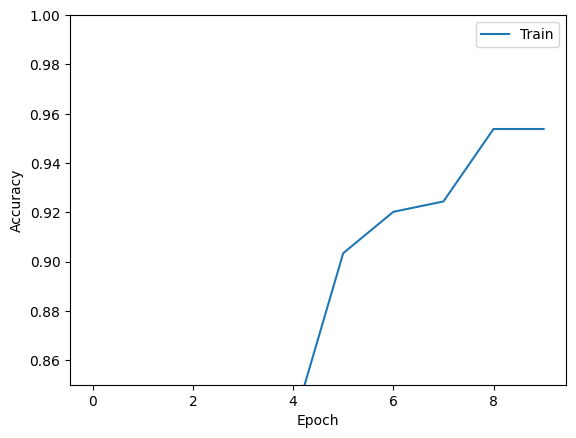

In [178]:
plt.plot(historyConv.history['accuracy'], label='Train')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.85, 1])

In [179]:
model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - 13ms/step - accuracy: 0.9748 - loss: 0.1128


[0.11283499002456665, 0.9747899174690247]

In [180]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.1531376 , 0.15277927, 0.3810499 , 0.15822662, 0.15480661],
       [0.15594415, 0.1550794 , 0.3672802 , 0.16520636, 0.15648992],
       [0.14888282, 0.14889847, 0.1488741 , 0.4044662 , 0.1488784 ],
       [0.14891037, 0.14897044, 0.14891343, 0.4042823 , 0.14892346],
       [0.16387461, 0.25118336, 0.20276785, 0.21453184, 0.16764233]],
      dtype=float32)>

In [181]:
import ipywidgets as widgets
label_names = ['Character (FORWARD)', 'Monster', 'Food', 'Item', 'Character (SIDE)']
index_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description='Image index:')
def show_image(index):
    plt.imshow(X_test[index])
    plt.show()
    prediction = probability_model(X_test[index:index+1]).numpy()
    print(f'Predicted label: {np.argmax(prediction)} ({label_names[np.argmax(prediction)]})')
    print(f'Actual label: {np.argmax(y_test[index])} ({label_names[np.argmax(y_test[index])]})')
    print('Predicted probabilities:')
    print(f'    Character (FORWARD): {'%.2f' % (prediction[0][0] * 100)}%')
    print(f'    Monster:             {'%.2f' % (prediction[0][1] * 100)}%')
    print(f'    Food:                {'%.2f' % (prediction[0][2] * 100)}%')
    print(f'    Item:                {'%.2f' % (prediction[0][3] * 100)}%')
    print(f'    Character (SIDE):    {'%.2f' % (prediction[0][4] * 100)}%')
widgets.interactive(show_image, index=index_slider)

interactive(children=(IntSlider(value=0, description='Image index:', max=118), Output()), _dom_classes=('widge…